# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedKFold

%matplotlib inline

<AxesSubplot:xlabel='Year'>

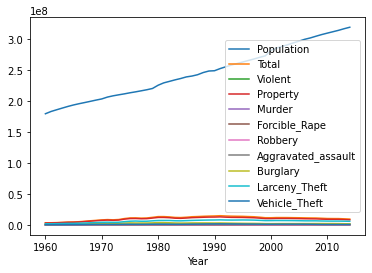

In [40]:

df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

In [41]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


# Para poner 2 ejes con sus leyendas
## https://www.kite.com/python/answers/how-to-add-secondary-axis-to-a-legend-in-python


In [42]:
df.iloc[:,1:].columns.tolist()

['Total',
 'Violent',
 'Property',
 'Murder',
 'Forcible_Rape',
 'Robbery',
 'Aggravated_assault',
 'Burglary',
 'Larceny_Theft',
 'Vehicle_Theft']

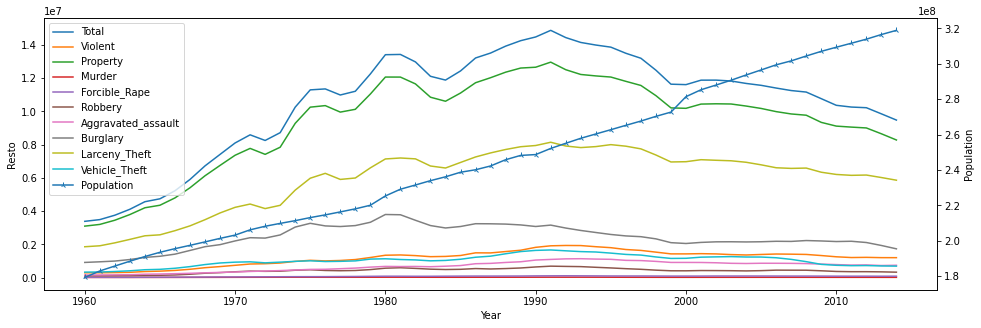

In [43]:
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(df.index, df.iloc[:,1:], label = df.iloc[:,1:].columns.tolist())
ax.set_ylabel('Resto')
ax.set_xlabel('Year')
ax2 = ax.twinx()
ax2.plot(df.index, df.Population, label= 'Population', marker = '2')
ax2.set_ylabel('Population')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax.legend(lines, labels, loc=0);

#ax.legend()
#ax2.legend(loc = 'left')
#plt.show()

In [44]:
df.drop(['Population', 'Total'], axis=1,inplace=True)
df.head()

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,
1960,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


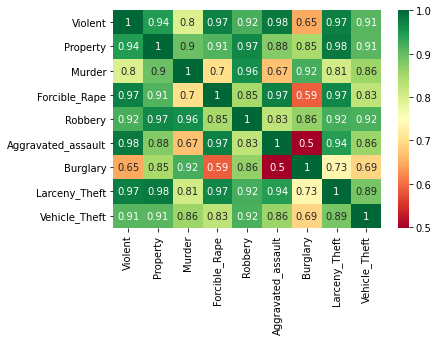

In [45]:
sns.heatmap(df.corr(), vmax=df.corr().max().max(), vmin=df.corr().min().min(), cmap="RdYlGn", annot= True);

## Columnas mejor correlacionadas

In [46]:
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False).iloc[8:19]

Vehicle_Theft       Vehicle_Theft         1.000000
Violent             Aggravated_assault    0.981071
Aggravated_assault  Violent               0.981071
Property            Larceny_Theft         0.980528
Larceny_Theft       Property              0.980528
Violent             Larceny_Theft         0.974791
Larceny_Theft       Violent               0.974791
Aggravated_assault  Forcible_Rape         0.974379
Forcible_Rape       Aggravated_assault    0.974379
                    Violent               0.973914
Violent             Forcible_Rape         0.973914
dtype: float64

## 5 columnas mejor correlacionadas con "Murder"

In [47]:
df.corr()['Murder'].sort_values(ascending = False).iloc[1:6].index.to_list()

['Robbery', 'Burglary', 'Property', 'Vehicle_Theft', 'Larceny_Theft']

## Modelo de regresión no lineal --> Polinomio grado 6

In [48]:
x = np.array(df[['Robbery', 'Burglary', 'Property', 'Vehicle_Theft', 'Larceny_Theft']])
y = np.array(df['Murder'])

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (44, 5)
x_test.shape: (11, 5)
y_train.shape: (44,)
y_test.shape: (11,)


In [51]:
model_pol = PolynomialFeatures(degree=6)

In [52]:
x_train_pol = model_pol.fit_transform(x_train, y_train)

In [53]:
model_linreg = LinearRegression()

In [54]:
model_linreg.fit(x_train_pol, y_train)

LinearRegression()